# Data Discovery 01: Predicting Solubility of Molecules in a dataset  

Data science has come a long way to merge with natural sciences to improve the lab research through prediction analysis and variable inputs. In this project, a work of Delaney on solubility of different molecules is run through a ML model to test the veracity of the model. I am reproducing his work.

- Using Jupyter notebook and libraries required for research in cheminfomatics. 
- Scikit Learn used for predictive modelling.
- Data visualization performed by matplotlib

1) **Installing RDKit** - the cheminfomatics module of python worked through Anaconda

In [2]:
conda install -c conda-forge rdkit   

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 22.11.1

Please update conda by running

    $ conda update -n base -c conda-forge conda




- **SMILES** - **S**implified **M**olecular **I**nput **L**ine **E**ntry **S**ystem is a line notation denoting the structure of the chemical compound or chemical data present in the dataset in one-dimensional form. 

- **PANDAS** - Pandas is a popular mathematical library of Python instrumental in analysing data or performing such operations.
- The Delaney dataset is found from a research paper of John S.Delaney in 2005.

In [1]:
import pandas as pd
solu= pd.read_csv("DM_Delaney.csv")
solu

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES
0,"1,1,1,2-Tetrachloroethane",-2.180,-2.794,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.000,-2.232,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-1.740,-2.549,ClC(Cl)C(Cl)Cl
3,"1,1,2-Trichloroethane",-1.480,-1.961,ClCC(Cl)Cl
4,"1,1,2-Trichlorotrifluoroethane",-3.040,-3.077,FC(F)(Cl)C(F)(Cl)Cl
...,...,...,...,...
1139,vamidothion,1.144,-1.446,CNC(=O)C(C)SCCSP(=O)(OC)(OC)
1140,Vinclozolin,-4.925,-4.377,CC1(OC(=O)N(C1=O)c2cc(Cl)cc(Cl)c2)C=C
1141,Warfarin,-3.893,-3.913,CC(=O)CC(c1ccccc1)c3c(O)c2ccccc2oc3=O
1142,Xipamide,-3.790,-3.642,Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O


In [2]:
solu.SMILES[9]
#The smiles notation of the specific compound is executed as output.

'C1CCc2ccccc2C1'

- RDKit needs to understand the structural information by converting the SMILES notation, which is an ASCII text into a our RDKit object. **MolFromSmiles** serves the purpose.

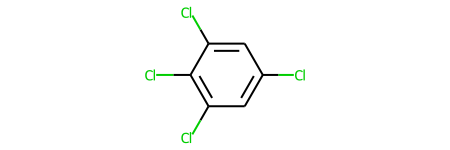

In [4]:
from rdkit import Chem
Chem.MolFromSmiles(solu.SMILES[10])

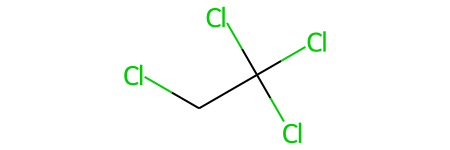

In [5]:
Chem.MolFromSmiles('ClCC(Cl)(Cl)Cl') #The notation can also be given as input

In [6]:
m = Chem.MolFromSmiles('ClCC(Cl)(Cl)Cl')

m.GetNumAtoms() 
#6 atoms present in structure, as served by the function- GetNumAtoms()

6

## 2) Calculating the molecular descriptors using the RDkit.##

- The loop will iterate for each element in the list of solu.smiles 
- It will convert the element into an RD kit object
- Converts the RDkit object of the molecule into the mol variable 
- Append the small object into the mol list.

In [8]:
mol_l=[]
for ele in solu.SMILES:
    mol= Chem.MolFromSmiles(ele)
    mol_l.append(mol)
mol_l
len(mol_l)

#mol_l.head() doesn't work for list.So, for first five elements, use the following function:
mol_l[:5]

In [19]:
mol_l2 = [Chem.MolFromSmiles(ele) for ele in solu.SMILES] #another method
#mol_l2

# **3) Calculation of Molecular Descriptors**

The RDKit object will be applied to decipher the molecular descriptors. To predict **LogS (log of the aqueous solubility)**, the study by Delaney makes use of 4 molecular descriptors:

- cLogP (Octanol-water partition coefficient)- Ratio of solubility of molecule in octanol and water
- MW (Molecular weight)
- RB (Number of rotatable bonds)
- AP (Aromatic proportion = number of aromatic atoms / total number of heavy atoms)
- The last descriptor- AP, needs to be computed manually. Rest are done by the RDKit object. 



In [9]:
import numpy as np
from rdkit.Chem import Descriptors
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def gen(smiles, verbose=False):

    moldata= []  
    #convert SMILES text to RDkit object
    for ele in smiles:
        mol=Chem.MolFromSmiles(ele) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
    #three molecular descriptors are calculated here
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_MolWt = Descriptors.MolWt(mol)
        desc_NumRotatableBonds = Descriptors.NumRotatableBonds(mol)
           
        row = np.array([desc_MolLogP,
                        desc_MolWt,
                        desc_NumRotatableBonds])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MolLogP","MolWt","NumRotatableBonds"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames) #Dataframe is a "table" of rows and columns
    
    return descriptors

#Storing the descriptors in an array

In [10]:
df = gen(solu.SMILES)
df
#descriptro is put in the dataframe

,MolLogP,MolWt,NumRotatableBonds
0,2.59540,167.850,0.0
1,2.37650,133.405,0.0
2,2.59380,167.850,1.0
3,2.02890,133.405,1.0
4,2.91890,187.375,1.0
...,...,...,...
1139,1.98820,287.343,8.0
1140,3.42130,286.114,2.0
1141,3.60960,308.333,4.0
1142,2.56214,354.815,3.0


## 4) Final Molecular Descriptor for the dataset
- Manually, the RDKit object is stored in a variable.
- GetAtom retrieve all atoms from molecule
- GetIsAromatic finds if molecule is aromatic or not

In [11]:
m = Chem.MolFromSmiles('COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21') #Checking for this atom, user-input dependent
aromatic_atoms = [m.GetAtomWithIdx(i).GetIsAromatic() for i in range(m.GetNumAtoms())]
aromatic_atoms
#The array describes each atom

[False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True]

In [12]:
def AromaticAtoms(m):
  aromatic_atoms = [m.GetAtomWithIdx(i).GetIsAromatic() for i in range(m.GetNumAtoms())]
  aa_count = []
  for i in aromatic_atoms:
    if i==True:
      aa_count.append(1)
  sum_aa_count = sum(aa_count)
  return sum_aa_count

#Finds the total number of aromatic atoms

In [13]:
AromaticAtoms(m) #zero output for non-aromatic atoms

19

In [14]:
# Aromatic atom description for entire dataset
desc_AromaticAtoms = [AromaticAtoms(element) for element in mol_l] #short process to store elements in the array
desc_AromaticAtoms

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 0,
 6,
 0,
 0,
 0,
 0,
 6,
 6,
 0,
 6,
 6,
 6,
 6,
 6,
 0,
 6,
 6,
 0,
 0,
 6,
 10,
 6,
 6,
 0,
 6,
 6,
 6,
 6,
 10,
 6,
 0,
 10,
 0,
 14,
 0,
 0,
 14,
 0,
 0,
 0,
 0,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 10,
 0,
 0,
 0,
 0,
 0,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 10,
 0,
 0,
 12,
 10,
 14,
 6,
 10,
 10,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 0,
 12,
 12,
 12,
 12,
 0,
 0,
 12,
 0,
 0,
 0,
 0,
 0,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 6,
 6,
 12,
 12,
 6,
 0,
 6,
 12,
 6,
 6,
 6,
 6,
 0,
 0,
 10,
 0,
 6,
 12,
 12,
 6,
 12,
 6,
 6,
 6,
 6,
 0,
 0,
 0,
 0,
 6,
 6,
 6,
 12,
 12,
 6,
 10,
 6,
 6,
 6,
 12,
 10,
 14,
 10,
 10,
 0,
 6,
 0,
 0,
 0,
 0,
 6,
 12,
 0,
 10,
 6,
 0,
 6,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 10,
 6,
 0,
 0,
 0,
 0,
 10,
 6,
 0,
 6,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 14,
 0,

- Next step is computing Heavy Atoms for a single molecule and then the entire Dataset.

In [16]:
#This is just one molecule from the dataset
m = Chem.MolFromSmiles('COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21')
Descriptors.HeavyAtomCount(m)

34

In [17]:
desc_HeavyAtomCount = [Descriptors.HeavyAtomCount(element) for element in mol_l]
desc_HeavyAtomCount

[6,
 5,
 6,
 5,
 8,
 4,
 4,
 8,
 10,
 10,
 10,
 9,
 9,
 10,
 10,
 10,
 9,
 9,
 9,
 8,
 8,
 4,
 8,
 4,
 5,
 8,
 8,
 10,
 12,
 4,
 9,
 9,
 9,
 15,
 8,
 4,
 8,
 8,
 5,
 8,
 8,
 12,
 12,
 8,
 6,
 8,
 8,
 10,
 8,
 12,
 12,
 5,
 12,
 6,
 14,
 11,
 22,
 15,
 5,
 5,
 8,
 7,
 11,
 9,
 6,
 4,
 5,
 4,
 4,
 4,
 5,
 5,
 8,
 7,
 11,
 6,
 4,
 11,
 10,
 13,
 12,
 8,
 7,
 7,
 17,
 7,
 6,
 7,
 6,
 5,
 8,
 11,
 4,
 7,
 14,
 11,
 15,
 9,
 11,
 11,
 13,
 6,
 10,
 9,
 9,
 19,
 9,
 8,
 8,
 16,
 6,
 5,
 5,
 9,
 4,
 15,
 22,
 20,
 18,
 20,
 18,
 16,
 19,
 19,
 18,
 17,
 17,
 18,
 16,
 7,
 18,
 18,
 16,
 17,
 8,
 9,
 16,
 7,
 6,
 7,
 8,
 6,
 14,
 18,
 19,
 18,
 17,
 17,
 16,
 11,
 11,
 15,
 15,
 10,
 8,
 11,
 15,
 10,
 10,
 11,
 9,
 6,
 6,
 12,
 7,
 8,
 15,
 15,
 10,
 15,
 10,
 10,
 16,
 9,
 8,
 8,
 8,
 7,
 9,
 8,
 13,
 14,
 14,
 9,
 12,
 9,
 8,
 13,
 14,
 12,
 15,
 11,
 11,
 4,
 8,
 5,
 5,
 8,
 6,
 9,
 13,
 5,
 11,
 8,
 4,
 8,
 6,
 11,
 8,
 7,
 9,
 9,
 7,
 9,
 12,
 9,
 8,
 8,
 7,
 7,
 11,
 7,
 4,
 10,
 12,
 5,

**Reminder** :
- AP (Aromatic proportion = number of aromatic atoms / total number of heavy atoms)

In [18]:
#calculating the aromatic proportion
m = Chem.MolFromSmiles('COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21')
AromaticAtoms(m)/Descriptors.HeavyAtomCount(m)

0.5588235294117647

In [19]:
#The total dataset collected in an array
desc_AromaticProportion = [AromaticAtoms(element)/Descriptors.HeavyAtomCount(element) for element in mol_l]
desc_AromaticProportion

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.6,
 0.6,
 0.6,
 0.6666666666666666,
 0.6666666666666666,
 0.6,
 0.6,
 0.6,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.75,
 0.75,
 0.0,
 0.75,
 0.0,
 0.0,
 0.0,
 0.0,
 0.6,
 0.5,
 0.0,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.4,
 0.75,
 0.0,
 0.75,
 0.75,
 0.0,
 0.0,
 0.75,
 0.8333333333333334,
 0.5,
 0.75,
 0.0,
 0.75,
 0.75,
 0.6,
 0.75,
 0.8333333333333334,
 0.5,
 0.0,
 0.8333333333333334,
 0.0,
 1.0,
 0.0,
 0.0,
 0.9333333333333333,
 0.0,
 0.0,
 0.0,
 0.0,
 0.9090909090909091,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.9090909090909091,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.8333333333333334,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.9090909090909091,
 0.0,
 0.0,
 0.8571428571428571,
 0.9090909090909091,
 0.9333333333333333,
 0.6666666666666666,
 0.9090909090909091,
 0.9090909090909091,
 0.7692307692307693,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0

## 5) Combining the dataframe of last molecular descriptor with the dataframes of the three descriptors

In [20]:
#Dataframe of last MD is created
df_desc_AromaticProportion = pd.DataFrame(desc_AromaticProportion, columns=['AromaticProportion'])
df_desc_AromaticProportion

,AromaticProportion
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
1139,0.000000
1140,0.333333
1141,0.695652
1142,0.521739


In [21]:
df #DF with the first three MD 

,MolLogP,MolWt,NumRotatableBonds
0,2.59540,167.850,0.0
1,2.37650,133.405,0.0
2,2.59380,167.850,1.0
3,2.02890,133.405,1.0
4,2.91890,187.375,1.0
...,...,...,...
1139,1.98820,287.343,8.0
1140,3.42130,286.114,2.0
1141,3.60960,308.333,4.0
1142,2.56214,354.815,3.0


In [22]:
df_desc_AromaticProportion

,AromaticProportion
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
1139,0.000000
1140,0.333333
1141,0.695652
1142,0.521739


In [23]:
#Process of joining both DFs
X = pd.concat([df,df_desc_AromaticProportion], axis=1) #axis=1 means joining them column-wise(columns added)
X

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


## 6) Implementing the Model for Prediction step-by-step

- **X matrix** and scikit-learn for the model building shall predict the Y matrix
- **Y matrix**: log S or the solubility of the molecule.
- Model: **Linear Regression**

In [24]:
solu.head()

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES
0,"1,1,1,2-Tetrachloroethane",-2.18,-2.794,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.00,-2.232,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-1.74,-2.549,ClC(Cl)C(Cl)Cl
3,"1,1,2-Trichloroethane",-1.48,-1.961,ClCC(Cl)Cl
4,"1,1,2-Trichlorotrifluoroethane",-3.04,-3.077,FC(F)(Cl)C(F)(Cl)Cl


In [25]:
Y = solu.iloc[:,1]
Y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: measured log(solubility:mol/L), Length: 1144, dtype: float64

# 7) Data Split: Test and Training Sets

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2) 
#20% is test set and 80% is training set that works up the model

In [32]:
#Linear Regression package is applied- linear_model
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

model = linear_model.LinearRegression() #model variable stores the LR calculations
model.fit(X_train, Y_train)

LinearRegression()

## 8) Predicting the X Training set
- predict() finds out the veracity of the LR in X training set
- Finding out coefficient, intercept and mean squared error the of the data points from the estimated line.
- Linear Regression requires pearson correlation coefficient to measure the efficiency. 
- The model will yield different values as per the data

In [33]:
Y_pred_train = model.predict(X_train)

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_train, Y_pred_train))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_train, Y_pred_train))

Coefficients: [-0.74271148 -0.00669818  0.00624843 -0.38819237]
Intercept: 0.24798189967329032
Mean squared error (MSE): 1.05
Coefficient of determination (R^2): 0.76


## 9) Predicting the X Test Set

- Linear Regression requires pearson correlation coefficient to measure the efficiency. 
- The model will yield different values as per the data
- In both test and training sets, the CoD comes out as 0.76.

In [34]:
Y_pred_test = model.predict(X_test)

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_train, Y_pred_train))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_train, Y_pred_train))

Coefficients: [-0.74271148 -0.00669818  0.00624843 -0.38819237]
Intercept: 0.24798189967329032
Mean squared error (MSE): 1.05
Coefficient of determination (R^2): 0.76


## 10) Deductions from Research of Delaney

- The paper reported the four parameters(MD) have "significant contributions" in working the model. 
- The resultant Linear Regression equation is:

   **Log(Sw)= 0.16 -0.63 clogP - 0.0062 MWT + 0.066 RB - 0.74 AP**
   
- My predicting model produces the results above. Comparing the two an putting the values, my equation:

   **Log(Sw)= 0.25 -0.74 clogP - 0.0066 MWT + 0.006 RB - 0.39 AP** (approx)
   
- Close enough! However, the model is built on only the training set and should be applied for the entire dataset.

## 11) Applying Model on Entire Dataset

- '%.2f'is a formatter that rounds the value upto 2 decimal places.
- the resultant equation produced by my model is printed

In [51]:
y_int= '%.2f' % model.intercept_
LogP= '%.2f LogP' % model.coef_[0]
MWT= '%.2f MWT' % model.coef_[1]
RB= '%.2f RB' % model.coef_[2]
AP= '%.2f AP' % model.coef_[3]

print('Log(Sw) = ' + ' ' + y_int + ' ' + LogP + ' ' + MWT + ' ' + RB + ' ' + AP)

Log(Sw) =  0.25 -0.74 LogP -0.01 MWT 0.01 RB -0.39 AP


# 12) No Data Split: Everything is run by Model 

In [41]:
comp_ds= linear_model.LinearRegression()
comp_ds.fit(X,Y)

LinearRegression()

In [42]:
ds_pred= comp_ds.predict(X)

#Alternative: ds_pred= model.predict(X) since the training set produces the results next

In [45]:
print('Coefficients:', comp_ds.coef_)
print('Intercept:', comp_ds.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, ds_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, ds_pred))

Coefficients: [-0.74173609 -0.00659927  0.00320051 -0.42316387]
Intercept: 0.2565006830997172
Mean squared error (MSE): 1.01
Coefficient of determination (R^2): 0.77


In [49]:
ds_y_int = '%.2f' % comp_ds.intercept_
ds_LogP = '%.2f LogP' % comp_ds.coef_[0]
ds_MWT = '%.4f MWT' % comp_ds.coef_[1]
ds_RB = '+ %.4f RB' % comp_ds.coef_[2]
ds_AP = '%.2f AP' % comp_ds.coef_[3]

In [50]:
print('Log(Sw) = ' + ' ' + ds_y_int + ' ' + ds_LogP + ' ' + ds_MWT + ' ' + ds_RB + ' ' + ds_AP)

Log(Sw) =  0.26 -0.74 LogP -0.0066 MWT + 0.0032 RB -0.42 AP


Applying LR on entire dataset, we have reached to results. The resultant equation:

- **Log(Sw)= 0.26 -0.74 clogP - 0.0066 MWT + 0.0032 RB - 0.42 AP** 
- Small changes in RB and AP coefficients is noticed.

## 13) Scattered Plots of the Distribution

- **subplot(2,1,1)**- 2 refers to two rows, 1 refers to column, 1 refers to first plot
- **c**- Colour
- **alpha**- transparency

In [53]:
import matplotlib.pyplot as plt

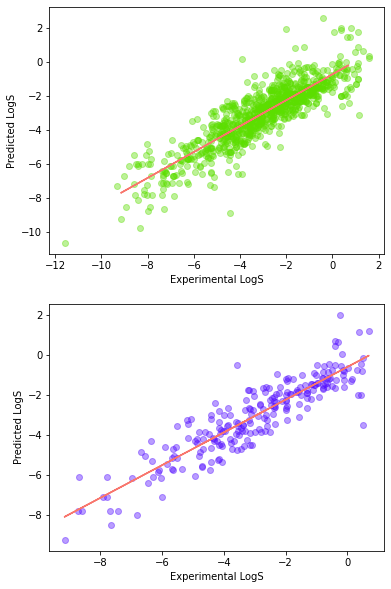

In [68]:
plt.figure(figsize=(6,10)) #Dimensions of the figure, can be adjusted

# First scattered plot
plt.subplot(2, 1, 1)
plt.scatter(x=Y_train, y=Y_pred_train, c="#5CDE00", alpha=0.4)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y_train, Y_pred_train, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")

plt.xlabel('Experimental LogS')
plt.ylabel('Predicted LogS')


# Second scattered plot
plt.subplot(2, 1, 2)
plt.scatter(x=Y_test, y=Y_pred_test, c="#520CFF", alpha=0.4)

z = np.polyfit(Y_test, Y_pred_test, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")

plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')

plt.savefig('plot_vert_logS.png')
plt.savefig('plot_vert_logS.pdf')
plt.show()